# Projet final Machine learning for Time series :

### Testing MSDL for synthetic data :

### Testing MSDL for FMRI data :

In [ ]:
# imports
import nilearn
from nilearn import datasets
from nilearn import plotting
from nilearn.image import mean_img
import pandas as pd
from nilearn import image, plotting
import numpy as np
from nilearn.input_data import NiftiMasker
from nilearn.image import concat_imgs
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_stat_map
from nilearn.image import index_img

# https://nilearn.github.io/dev/modules/generated/nilearn.datasets.fetch_atlas_msdl.html#nilearn.datasets.fetch_atlas_msdl


In [13]:
# Charger un dataset (par exemple : données de resting-state)
dataset = datasets.fetch_development_fmri(n_subjects=20)
fmri_files = dataset.func  # Chemins vers les fichiers fMRI
confounds = dataset.confounds  # Informations supplémentaires pour correction


[get_dataset_dir] Dataset found in C:\Users\Sara Meziane\nilearn_data\development_fmri
[get_dataset_dir] Dataset found in C:\Users\Sara Meziane\nilearn_data\development_fmri\development_fmri
[get_dataset_dir] Dataset found in C:\Users\Sara Meziane\nilearn_data\development_fmri\development_fmri
[fetch_single_file] Downloading data from https://osf.io/download/5cb46e92a3bc970019f0717f/ ...
Downloaded 2105344 of 6295931 bytes (33.4%%,    2.0s remaining)
[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from https://osf.io/download/5c8ff38c4712b4001a3b5573/ ...
[fetch_single_file]  ...done. (1 seconds, 0 min)

[fetch_single_file] Downloading data from https://osf.io/download/5c8ff38da743a900176080a2/ ...
Downloaded 2760704 of 6384587 bytes (43.2%%,    1.3s remaining)
Downloaded 5873664 of 6384587 bytes (92.0%%,    0.2s remaining)
[fetch_single_file]  ...done. (3 seconds, 0 min)

[fetch_single_file] Downloading data from https://osf.io/download/5cb47016a

In [ ]:
# Créer un masque standard du cerveau
masker = NiftiMasker(smoothing_fwhm=6, standardize=True, detrend=True, mask_strategy='epi')

# concaténation des images  
fmri_4d = concat_imgs(fmri_files)

# Appliquer le masque pour extraire les séries temporelles
time_series = masker.fit_transform(fmri_4d)


In [17]:
# Centrer et normaliser les séries temporelles
time_series_normalized = (time_series - np.mean(time_series, axis=0)) / np.std(time_series, axis=0)


C:\Users\Sara Meziane\AppData\Local\Temp\ipykernel_16936\2687074292.py:10: FutureWarning: The nifti_maps_masker_ attribute is deprecated andwill be removed in Nilearn 0.11.3. Please use maps_masker_ instead.
  canica.fit(fmri_files)


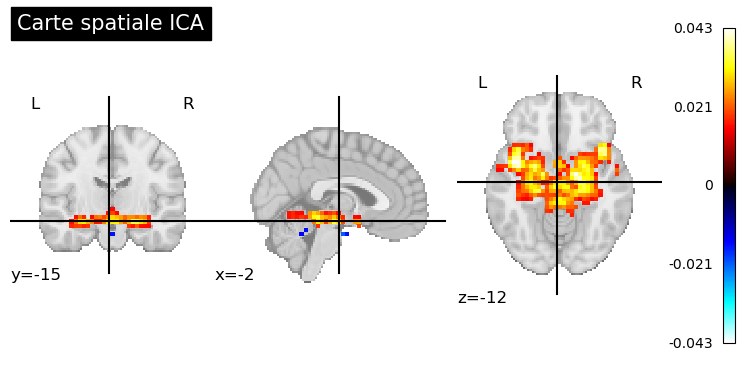

In [ ]:
# Initialiser un modèle ICA
canica = CanICA(n_components=40, mask=masker.mask_img_, random_state=0)

# Ajuster le modèle aux données
canica.fit(fmri_files)

# Extraire les cartes spatiales
components_img = canica.components_img_
first_component_img = index_img(components_img, 0)

# Visualiser une composante
plot_stat_map(first_component_img, title="Carte spatiale ICA", display_mode="ortho")